In [1]:
import numpy as np
import lightkurve as lk
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import lightkurve_stitching as lks

## Define Target and Stitch Sectors

In [2]:
# set light curve properties
target = '349902873'
sectors = np.arange(27,40,1)
sectors = [str(i) for i in sectors]

# stitch light curves
lc = lks.prep_data(target, sectors, 1)

## Calculate Frequency and Periods of Modes

Use small window and bring the min_pwr down depending on LK documentation

In [3]:
# list of frequencies and periods at max power within each window
f = []
p = []
pwr = []

# frequency to stop analyzing at
end = 35

# minimum power to be considered significant
min_pwr = 0.00008

# start values of the frequency window
min_f = 0
max_f = 0.5

# value to move frequency window by
n = 0.5

while max_f <= end:
    # create periodogram within window
    pg = lc.to_periodogram(min_frequency = min_f, max_frequency = max_f) 
    
    # calculate frequency and period at max power
    F = pg.frequency_at_max_power
    P = pg.period_at_max_power
    
    # append frequency and period to list
    if pg.max_power > min_pwr:
        f.append(F.value)
        p.append(P.value)
        pwr.append(pg.max_power.value)
        
        # increase window by amount n
        min_f += n
        max_f += n
    else:
        # increase window by amount n
        min_f += n
        max_f += n
        
# Calculate change in f and p per point
delta_f = []
delta_p = []

for i in range(len(f) - 1):
    n = f[i+1] - f[i]
    delta_f.append(n)

for i in range(len(p) - 1):
    n = p[i] - p[i+1]
    delta_p.append(n)

In [4]:
# # use np.column_stack to join the arrays fo export
# data = np.column_stack((delta_f,delta_p))

# # write to a csv
# with open('test','w') as txt_file:
#     for line in data:
#         txt_file.write(" ".join(line) + "\n")

## Periodogram and Plots

In [5]:
# highest power
h = max(pwr)

# plot periodogram plus significant frequencies      
pg = lc.to_periodogram(minimum_frequency=0, maximum_frequency = 35)

# define frequency arrays
freq = pg.frequency.value
power = pg.power.value

Text(0, 0.5, 'Period Spacing (Log Scaled)')

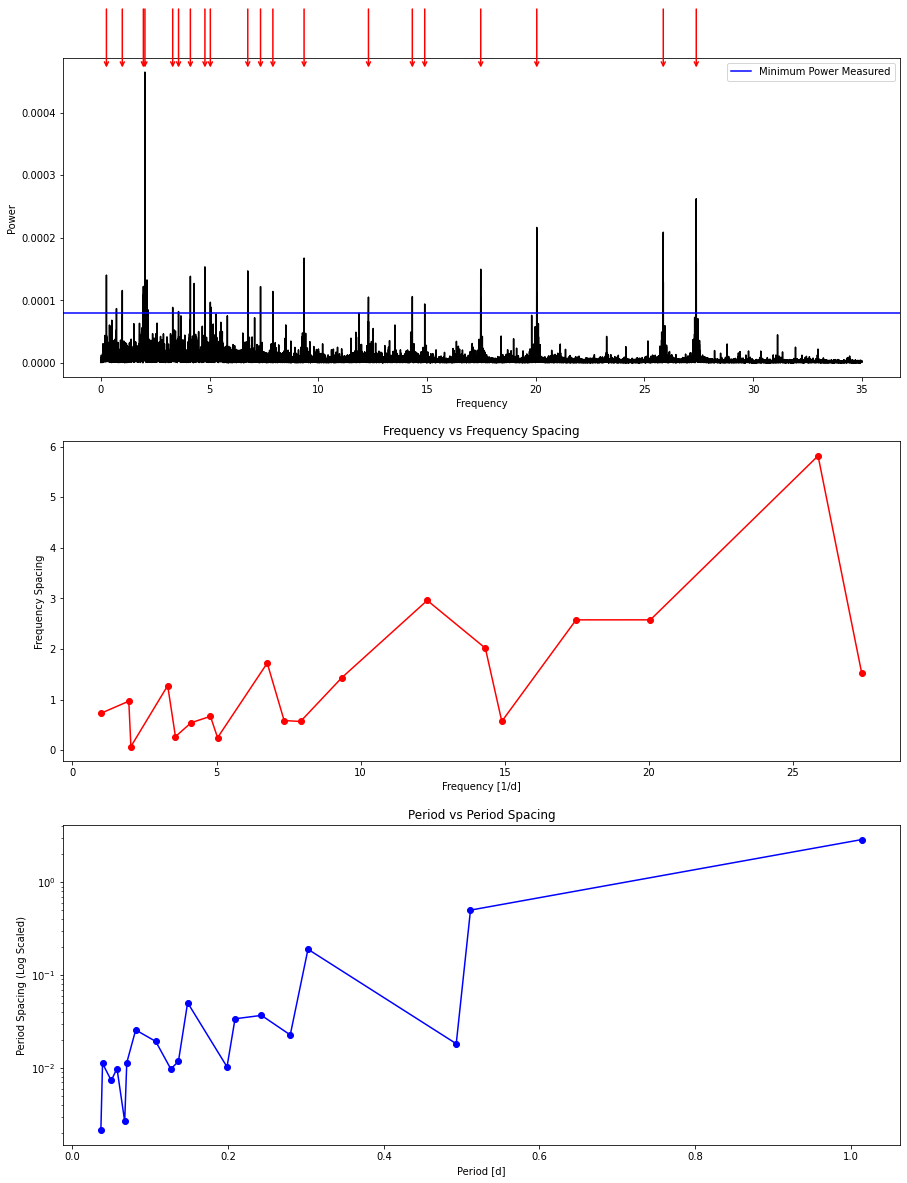

In [16]:
fig, axs = plt.subplots(3,1, figsize=(15,20))

# plot periodogram
axs[0].plot(freq, power, color = 'k')
axs[0].axhline(y=min_pwr, color = 'b', label = 'Minimum Power Measured')
axs[0].set_xlabel('Frequency')
axs[0].set_ylabel('Power')
# add labels of significant frequencies
for i in range(len(f)):
    axs[0].annotate('',
                xy=(f[i], h),
                xytext=(f[i], h + 0.0001),
                arrowprops=dict(arrowstyle='->', color='red', linewidth=1.5),
                label='Peaks of Interest')
axs[0].legend()

# plot frequency vs change in frequency
axs[1].plot(f[1:20], delta_f, marker='o', color='red')
axs[1].set_title('Frequency vs Frequency Spacing')
axs[1].set_xlabel('Frequency [1/d]')
axs[1].set_ylabel('Frequency Spacing')

# plot period vs change in period
axs[2].plot(p[1:20], delta_p, marker='o', color='b')
axs[2].set_title('Period vs Period Spacing')
axs[2].set_yscale('log')
axs[2].set_xlabel('Period [d]')
axs[2].set_ylabel('Period Spacing (Log Scaled)')